# Exploratory Data Analysis

Notes à moi-même :
- Essayer de normaliser les données pour voir ce que ça donne
- Détecter les outliers et reprendre les études pour voir ce que ça donne (ex : "...more" pour les genres, les prix trop élevés, les livres avec très peu de notes, ...)
- Anova pour les prix
- Rating moyen des auteurs en fonction de leur nombre de livres parus (distributions)

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import wordcloud as wc

## Preprocessing

In [56]:
df = pd.read_csv("./../../data/goodreads_data.csv", converters={"genres": lambda x: x[1:-1].split(",")})
df["publication_date"] = pd.to_datetime(df["published"].apply(lambda x: " ".join(str(x).split()[:3])), errors="coerce")
df.head(5)

,title,author,price,description,author_description,genres,n_ratings,n_reviews,ratings,pages_format,publication_info,literary_awards,original_title,series,characters,format,published,isbn,language,setting
0,The Weed That Strings the Hangman's Bag,Alan Bradley,4.99,From Dagger Award-winning and internationally ...,Librarian Note: There is more than one author ...,"['Mystery', 'Fiction', 'Historical Fiction',...",55692.0,5756.0,"[395.0, 1540.0, 12237.0, 25714.0, 15806.0]","364 pages, Hardcover","First published March 9, 2010",['Goodreads Choice Award Nominee for Mystery &...,The Weed That Strings the Hangman's Bag,['Flavia de Luce '],"['Flavia de Luce', 'Ophelia de Luce', 'Daphne ...","364 pages, Hardcover","March 9, 2010 by Delacorte Press",9780385342315 (ISBN10: 0385342314),English,NaN
1,A Good Man in Africa,William Boyd,11.99,"In the small African republic of Kinjanja, Bri...","Note: William^^BoydOf Scottish descent, Boyd w...","['Fiction', 'Africa', 'Humor', 'Novels', '...",5018.0,298.0,"[90.0, 257.0, 1222.0, 2184.0, 1265.0]","352 pages, Paperback","First published January 1, 1981","['Whitbread Award for First Novel (1981)', 'So...",A Good Man in Africa,NaN,['Morgan Leafy'],"352 pages, Paperback","January 14, 2003 by Vintage",9781400030026 (ISBN10: 1400030021),English,['Kinjanja']
2,It Had to Be You,Janice Thompson,0.00,Bella couldn't be happier that her long-feudin...,"Welcome to the wacky, wonderful world of inspi...","['Christian Fiction', 'Romance', 'Christian'...",2152.0,132.0,"[14.0, 86.0, 421.0, 735.0, 896.0]","336 pages, Paperback","First published January 1, 2010",NaN,NaN,"['Weddings by Bella', 'Galveston Weddings']",NaN,"336 pages, Paperback","May 1, 2010 by Revell",9780800733445 (ISBN10: 0800733444),English,"['Galveston, Texas']"
3,Missing,Kelley Armstrong,6.99,Everyone knows they left. No one knows they're...,Kelley Armstrong has been telling stories sinc...,"['Young Adult', 'Mystery', 'Thriller', 'Fic...",3393.0,491.0,"[54.0, 185.0, 799.0, 1308.0, 1047.0]","515 pages, ebook","First published April 18, 2017",NaN,Reeve's End (working title only),NaN,"['Edie Greene', 'Winter Crane', 'Tanner Robson...","515 pages, ebook","April 18, 2017 by Crown Books for Young Readers",9780399550348 (ISBN10: 0399550348),English,NaN
4,Dawn of Rebellion,Michelle Lynn,0.00,"My name is Dawn Nolan, and I've grown up on th...",Michelle moved around the Midwest most of her ...,"['Young Adult', 'Dystopia', 'Romance', 'Sci...",142.0,76.0,"[1.0, 6.0, 23.0, 41.0, 71.0]","321 pages, Paperback","First published January 1, 2013",NaN,Dawn of Rebellion,['Dawn of Rebellion'],NaN,"321 pages, Paperback","October 17, 2013 by CreateSpace Independent Pu...",9781492942429 (ISBN10: 1492942421),English,NaN


In [57]:
print("Number of books (with duplicates) : ", len(df))
df.drop_duplicates(subset=["title", "author"], keep='first', inplace=True, ignore_index=True)
print("Number of books (without duplicates) : ", len(df))

Number of books (with duplicates) :  24630
Number of books (without duplicates) :  19666


## Genres Analysis

In [77]:
df_genres = df.explode("genres")
df_genres["genres"] = df_genres["genres"].apply(lambda x: x.strip()[1:-1]) 
df_genres["genres"].astype("category")
df_genres = df_genres[df_genres["genres"] != "...more"]
genres_groups = df_genres.groupby("genres")
genres_number_of_books = genres_groups.count().sort_values(by="title", ascending=False)
genres_number_of_books.head(5)

,title,author,price,description,author_description,n_ratings,n_reviews,ratings,pages_format,publication_info,...,published,isbn,language,setting,one_star,two_stars,three_stars,four_stars,five_stars,average_rating
genres,,,,,,,,,,,,,,,,,,,,,
Fiction,9995,9995,9995,9993,9338,9995,9995,9995,9995,9995,...,9959,8647,9863,4051,9995,9995,9995,9995,9995,9995
Romance,6065,6065,6065,6064,5682,6065,6065,6065,6065,6065,...,6033,4360,5931,2166,6065,6065,6065,6065,6065,6065
Nonfiction,5116,5116,5116,5116,4023,5116,5116,5116,5116,5116,...,5093,4784,5020,706,5116,5116,5116,5116,5116,5116
Fantasy,4912,4912,4912,4912,4545,4912,4912,4912,4912,4912,...,4895,4001,4850,1330,4912,4912,4912,4912,4912,4912
Young Adult,3813,3813,3813,3813,3504,3813,3813,3813,3813,3813,...,3801,3148,3739,1209,3813,3813,3813,3813,3813,3813


Total number of different genres :  810


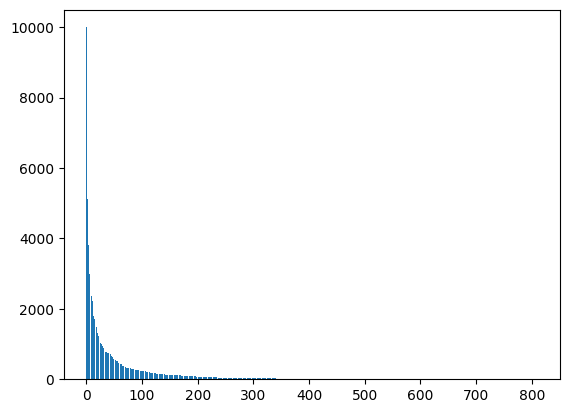

In [80]:
genres_list = np.unique(df_genres["genres"])
print("Total number of different genres : ", len(genres_list))

genres_dict = {genre: i for i, genre in enumerate(genres_list)}
genres_counts = df_genres["genres"].value_counts()

plt.bar(x=np.arange(len(genres_list)), height=genres_counts, align="center")
plt.show()

In [ ]:
# Evolution histogramme selon l'année